# Horizon Chart with Altair

## Imports

In [1]:
from horizonChart.horizonChart import HorizonChartGenerator as hcg
from altairThemes.standardTheme import standardTheme

In [2]:
import pandas as pd
import altair as alt
import numpy as np

In [15]:
alt.themes.register("standardTheme", standardTheme)
alt.themes.enable("standardTheme")

ThemeRegistry.enable('standardTheme')

## Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/maxthemillion/visualizingSales/master/data/sales_day.csv')
df.date = pd.to_datetime(df.date)

In [5]:
df = df.loc[(df.date>='2015-02-01') & 
            (df.date<='2015-03-31') & 
            (df.shop_id > 1) & 
            (~df.shop_id.isin([12, 9, 17, 20, 43, 10, 30, 40, 49, 50])), :]
len(df)

2269

In [6]:
grouped = df.groupby([pd.Grouper(key='shop_id'), pd.Grouper(key='date')]).sum()

In [7]:
for i in grouped.index.levels[0]:
    grouped.loc[i, 'index_base'] = grouped.loc[i,'revenue'][1]
    grouped.loc[i, 'm'] = np.median(grouped.loc[i, 'revenue'])

In [8]:
grouped['index'] = grouped.apply((lambda x: (x.revenue - x.index_base)/x.index_base), axis=1)
grouped['rel_median'] = grouped.apply((lambda x: (x.revenue - x.m)/(x.m)), axis=1)

In [9]:
grouped = grouped.reset_index()

## Sample plot

In [10]:
r = hcg(data=grouped, X='date', Y='rel_median', noLevels=4).generate()

In [11]:
r = r.properties(
    width=500,
    height=20
).facet(
    row=alt.Row('shop_id:O', title='Shop id')
).properties(
    title="Development of Sales Revenue per Shop"
).configure_facet(
    spacing=4
)

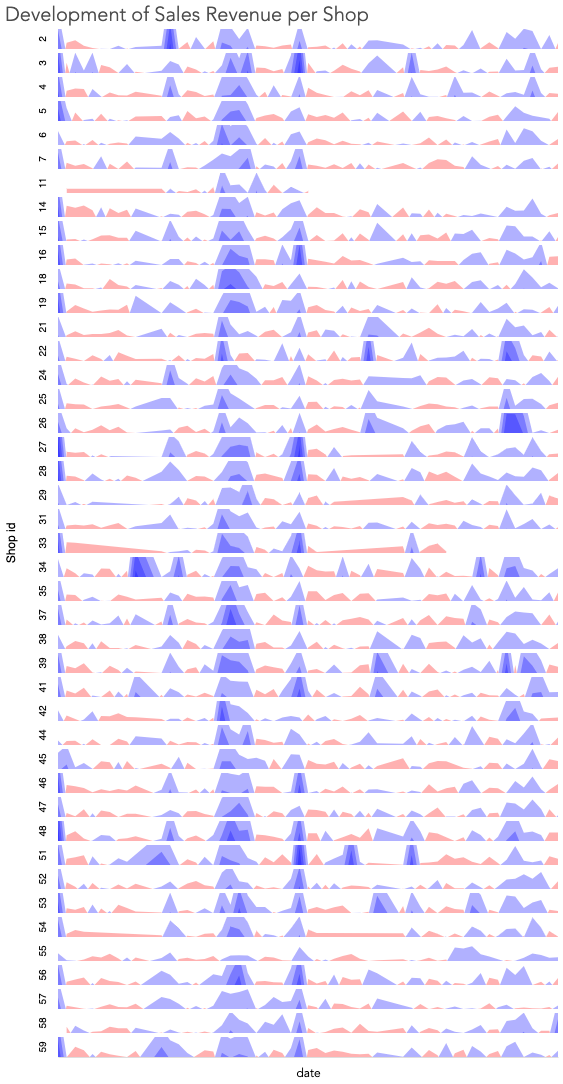

In [12]:
r

In [16]:
r.save('horizon_chart.json', embed_options={'actions': False})


### alternative example

In [24]:
bad = alt.Chart(grouped).mark_line().encode(
    alt.X('date:T'),
    alt.Y('rel_median:Q'),
    color=alt.Color('shop_id:O', legend=None)
).properties(
    width=500,
    height=400
)

bad.save('spaghetti.json')